In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import sys, os, time, csv, glob, cv2

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Settings
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision = 5, suppress = True)

Using plaidml.keras.backend backend.


In [2]:
train_normal = []
train_attack = []
test_normal = []
test_attack = []

for i in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/80-20/train_normal/train_normal_equ_*.jpg', recursive=True):
    train_normal.append(cv2.imread(i, cv2.IMREAD_GRAYSCALE))

for j in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/80-20/train_attack/train_attack_equ_*.jpg', recursive=True):
    train_attack.append(cv2.imread(j, cv2.IMREAD_GRAYSCALE))

for k in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/80-20/test_normal/test_normal_equ_*.jpg', recursive=True):
    test_normal.append(cv2.imread(k, cv2.IMREAD_GRAYSCALE))

for l in glob.glob('/Users/ryan/NSL CNN/2d-cnn/split_images/80-20/test_attack/test_attack_equ_*.jpg', recursive=True):
    test_attack.append(cv2.imread(l, cv2.IMREAD_GRAYSCALE))

train_normal = np.array(train_normal)
train_attack = np.array(train_attack)
test_normal = np.array(test_normal)
test_attack = np.array(test_attack)

In [3]:
np.shape(train_normal), np.shape(train_attack), np.shape(test_normal), np.shape(test_attack)

# for i in range(0, 2):
#   plt.imshow(train_normal[i], cmap = 'gray')
#   plt.show()

# for i in train_normal:
#   print(i)


## MORE NORMAL DATA FOR TESTING TO GET SAME RATIO

((1714, 64, 64), (1576, 64, 64), (429, 64, 64), (394, 64, 64))

0.0


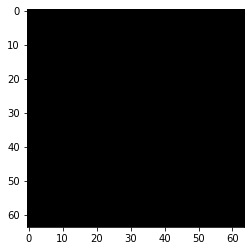

1.959692425990004


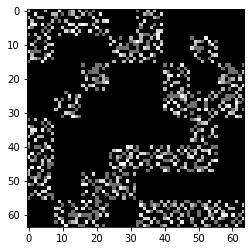

4.5547404844290655


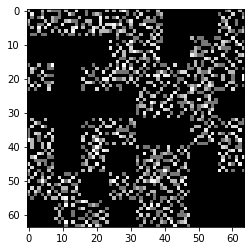

4.5547404844290655


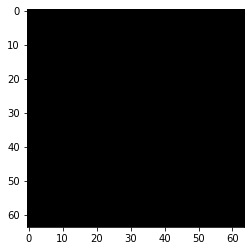

7.051472510572856


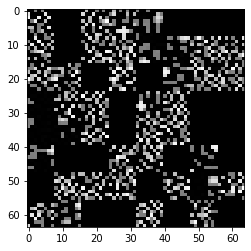

8.227512495194157


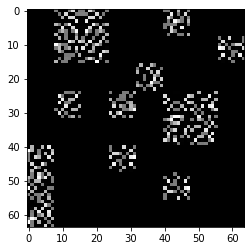

9.263483275663205


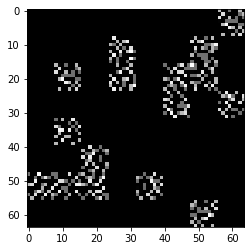

9.349357939254133


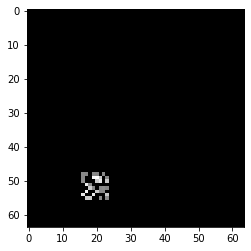

9.349357939254133


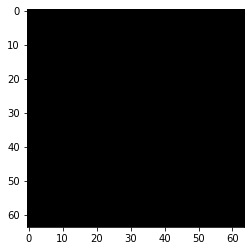

9.349357939254133


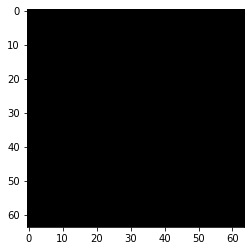

9.349357939254133


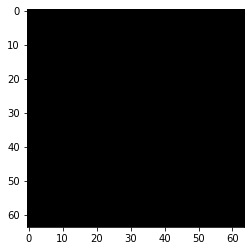

10.285336409073432


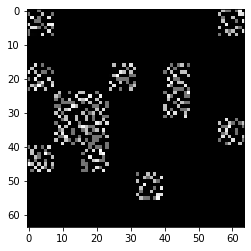

10.285336409073432


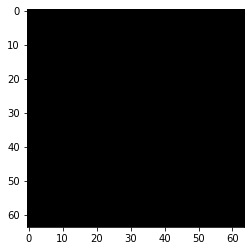

10.285336409073432


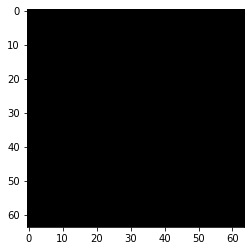

11.215009611687812


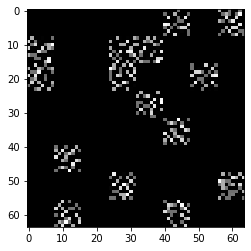

14.830865051903112


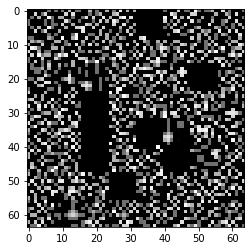

20.267327950788157


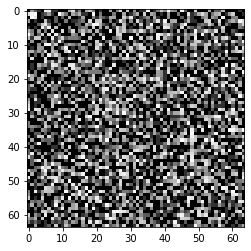

26.636155324875048


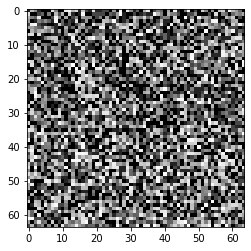

33.11564782775856


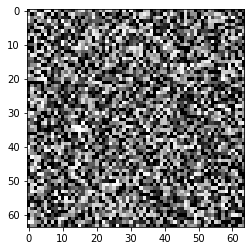

38.59269511726259


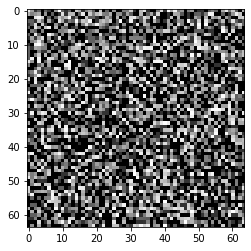

38.59269511726259


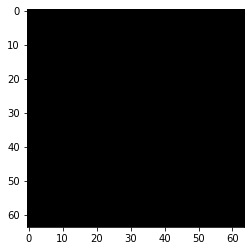

44.439461745482504


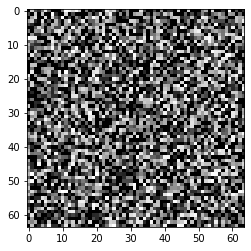

44.439461745482504


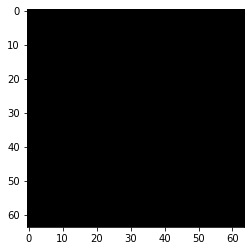

44.439461745482504


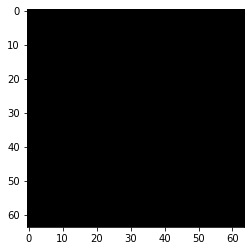

46.559615532487506


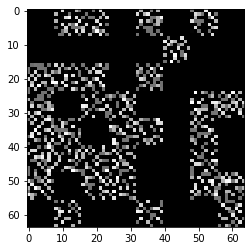

46.62811226451365


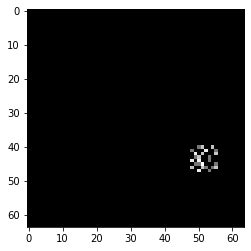

46.62811226451365


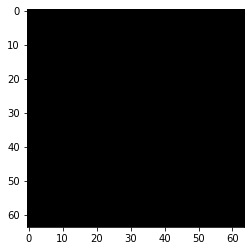

47.41033448673588


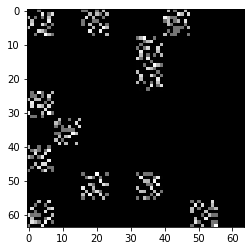

51.61453287197232


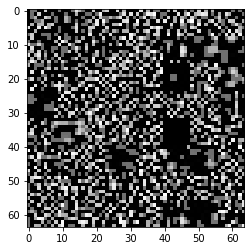

54.188665897731646


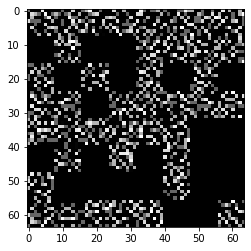

54.188665897731646


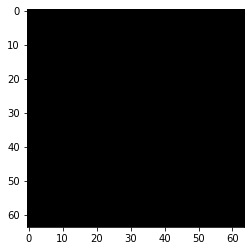

59.969288735101884


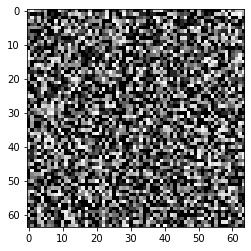

63.811672433679355


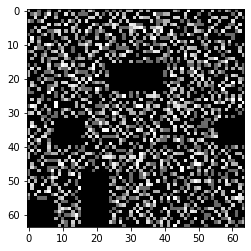

64.63658592848904


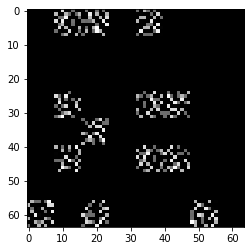

65.14866589773163


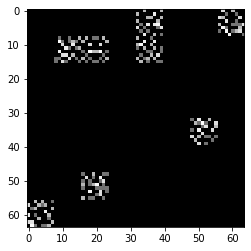

68.76608996539791


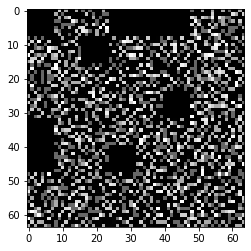

68.76608996539791


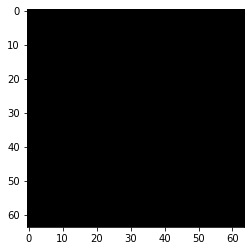

68.76608996539791


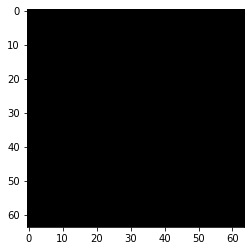

68.76608996539791


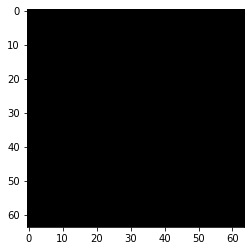

68.76608996539791


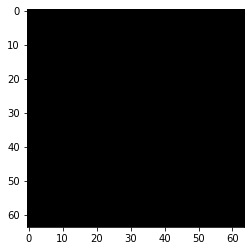

68.76608996539791


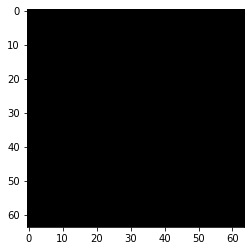

68.76608996539791


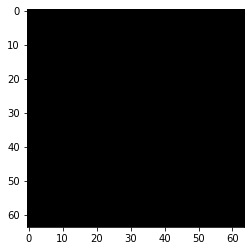

68.76608996539791


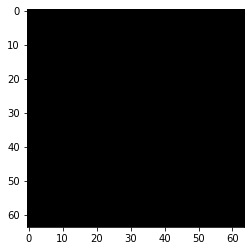

68.76608996539791


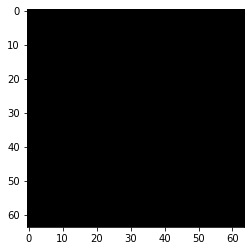

68.76608996539791


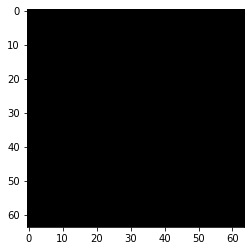

68.76608996539791


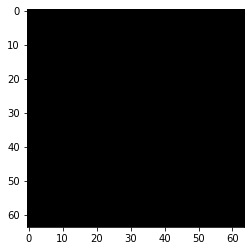

68.76608996539791


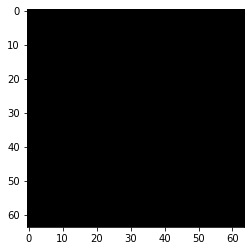

68.76608996539791


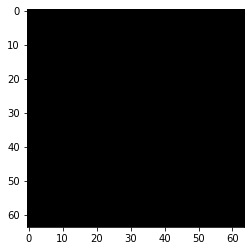

68.76608996539791


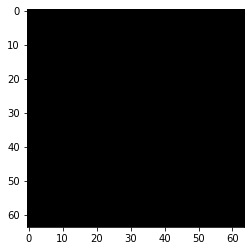

68.76608996539791


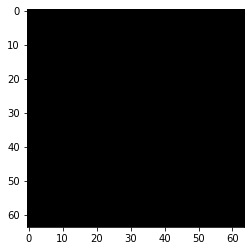

68.76608996539791


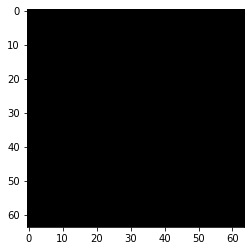

68.76608996539791


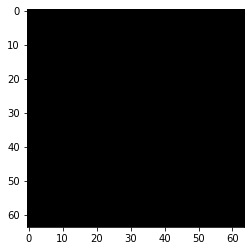

68.76608996539791


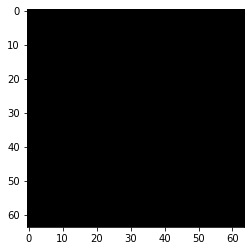

68.76608996539791


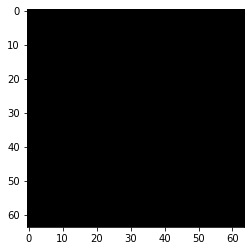

68.76608996539791


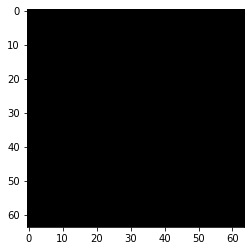

68.76608996539791


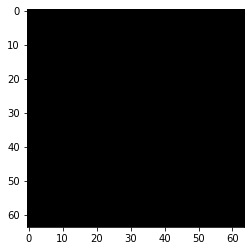

69.44367550941945


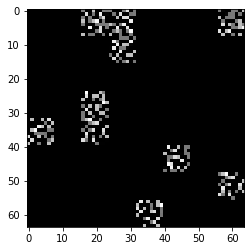

69.44367550941945


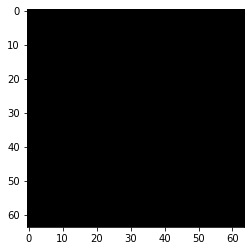

73.34941945405612


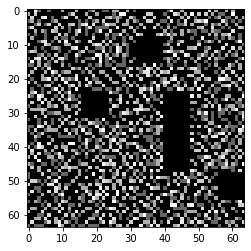

73.59861591695501


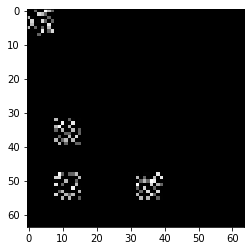

73.59861591695501


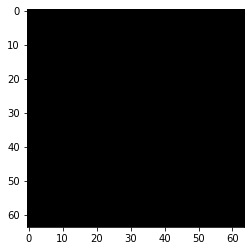

79.58128412149172


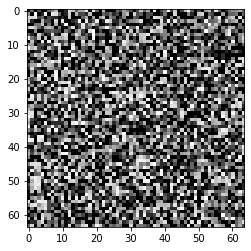

83.87480199923105


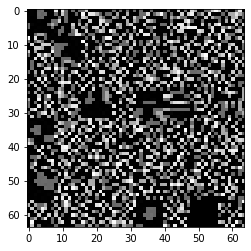

84.41087274125336


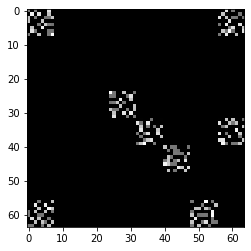

86.52126105344098


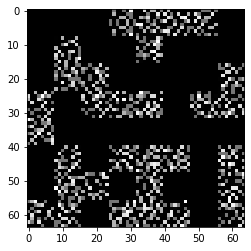

86.52126105344098


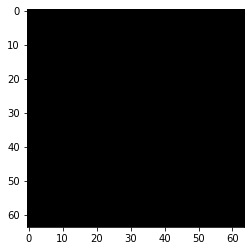

86.52126105344098


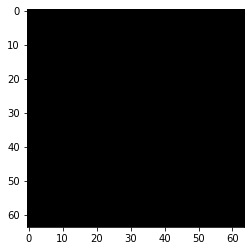

86.52126105344098


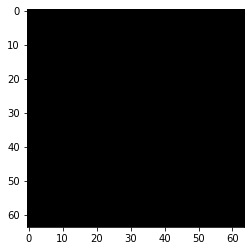

89.02512879661668


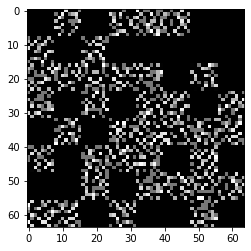

94.95630911188005


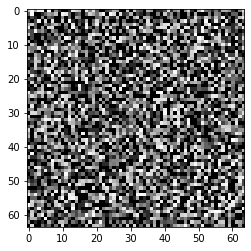

94.95630911188005


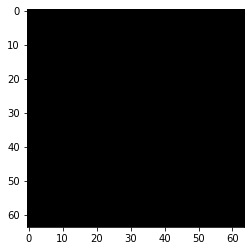

95.0233448673587


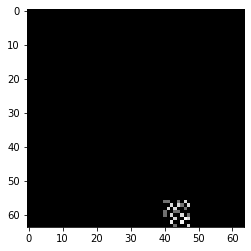

100.3120799692426


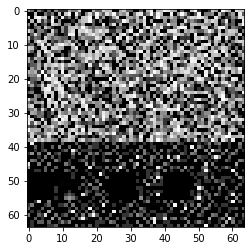

105.80742791234141


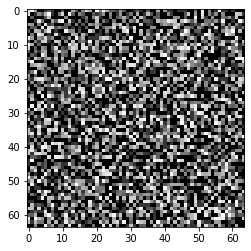

111.200430603614


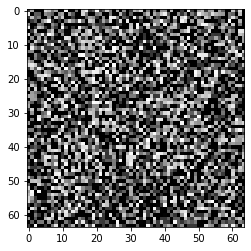

117.80161476355248


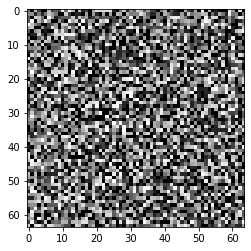

121.5107727797001


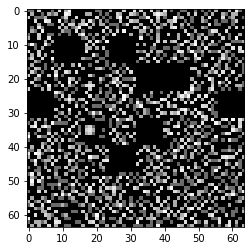

122.37116493656285


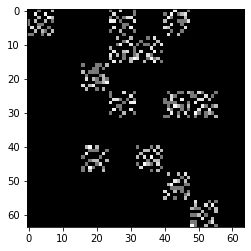

122.37116493656285


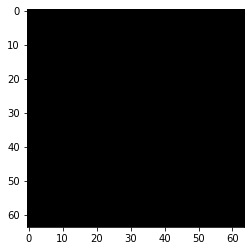

122.92682814302191


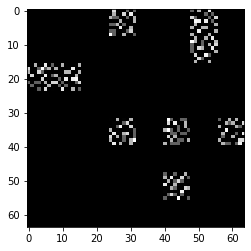

122.92682814302191


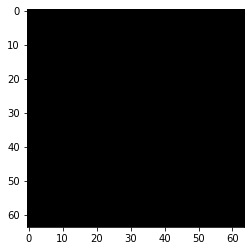

122.92682814302191


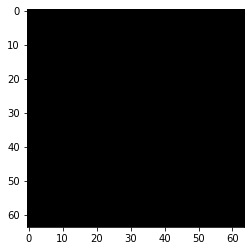

122.99532487504806


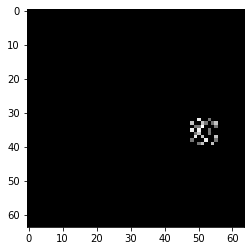

122.99532487504806


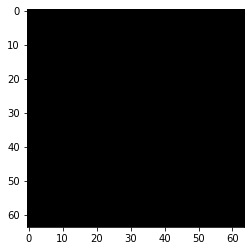

124.02477508650519


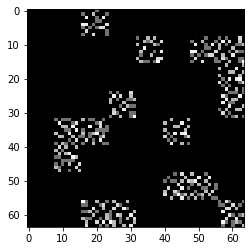

124.3277970011534


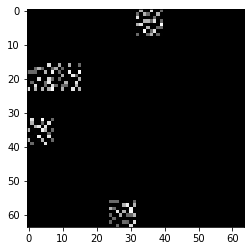

126.43383314109957


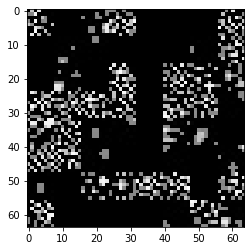

126.43383314109957


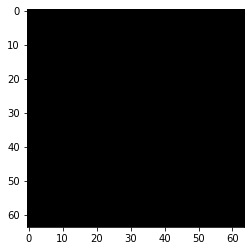

126.99752402921952


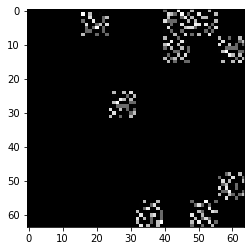

129.24219915417146


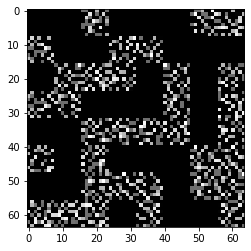

131.00166089965396


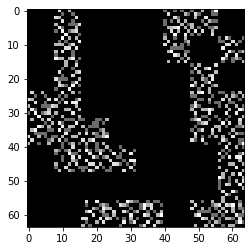

131.00166089965396


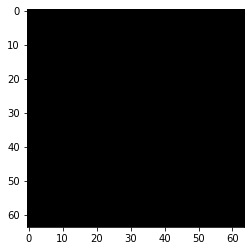

139.8469819300269


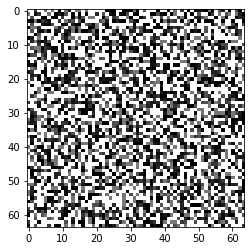

142.41102652825836


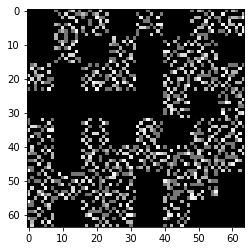

144.03818531334105


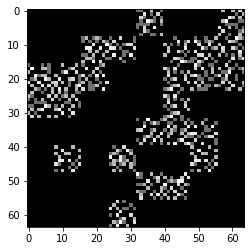

144.37459438677433


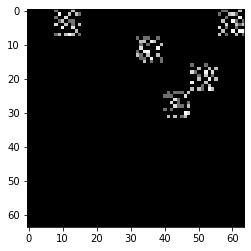

145.03569396386007


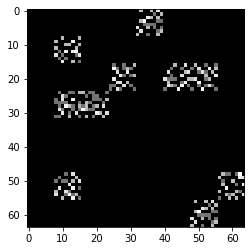

145.8439830834295


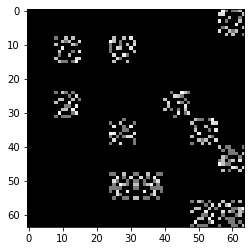

148.22858900422915


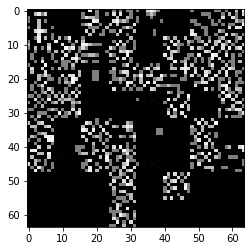

148.22858900422915


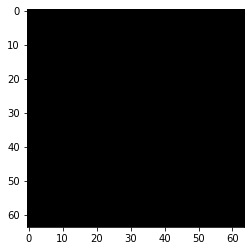

148.6237908496732


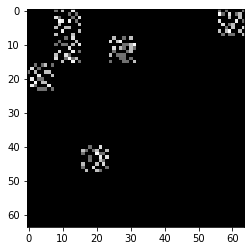

148.6237908496732


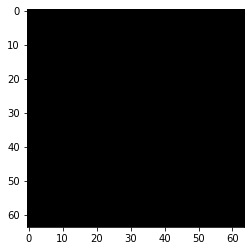

149.13577854671283


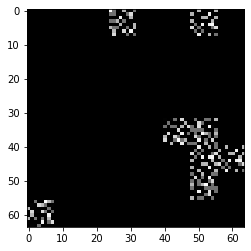

149.13577854671283


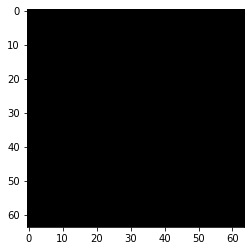

149.13577854671283


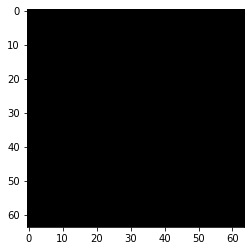

149.13577854671283


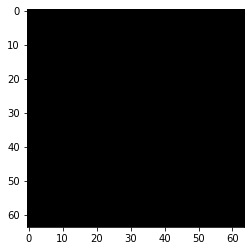

149.13577854671283


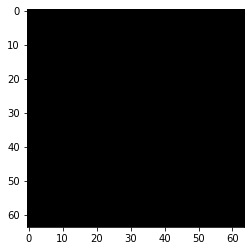

149.13577854671283


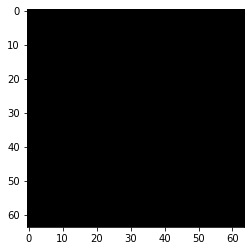

158.47466359092658


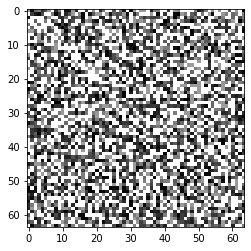

163.91926182237603


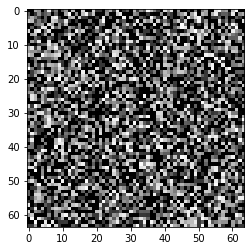

167.45467128027684


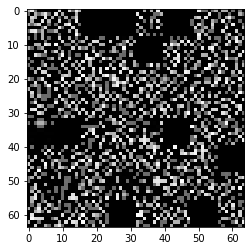

174.10823529411766


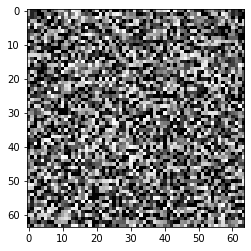

174.10823529411766


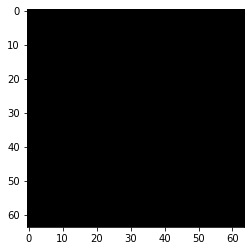

182.9623836985775


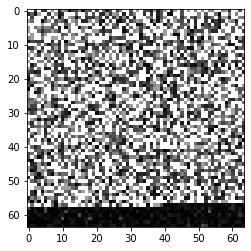

185.38935793925415


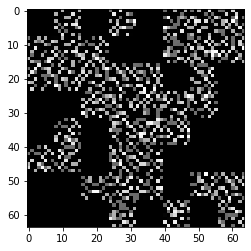

185.38935793925415


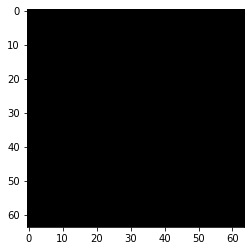

185.38935793925415


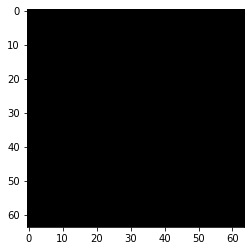

185.38935793925415


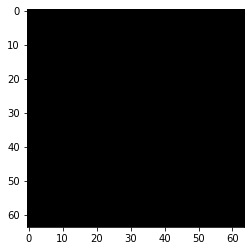

185.38935793925415


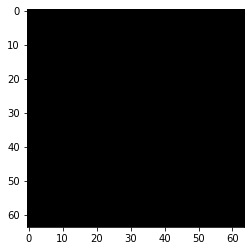

189.2091810841984


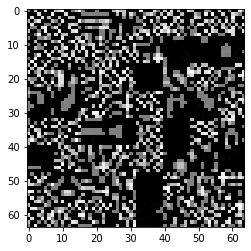

195.1161245674741


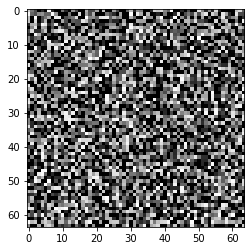

195.1161245674741


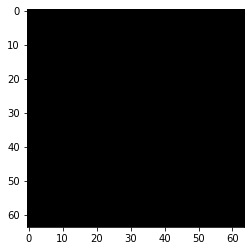

197.54332948865826


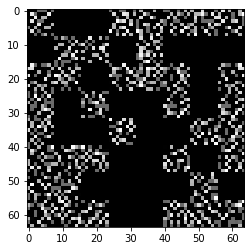

201.58821991541717


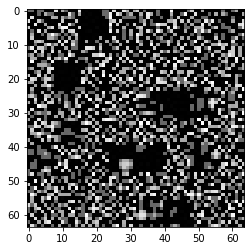

201.7129104190696


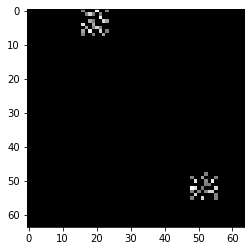

202.12667435601693


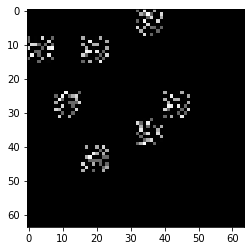

208.52762783544793


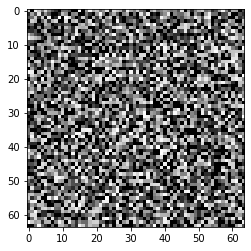

208.9855747789312


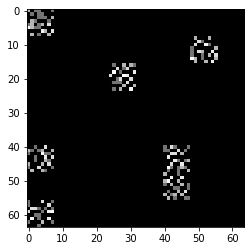

212.9855286428297


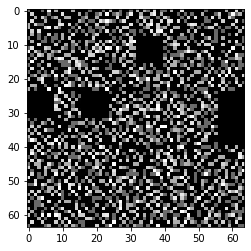

212.9855286428297


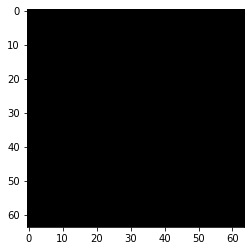

212.9855286428297


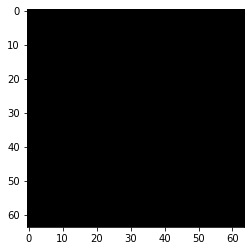

212.9855286428297


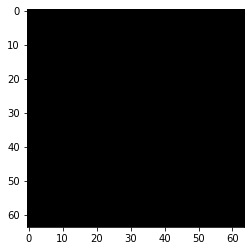

212.9855286428297


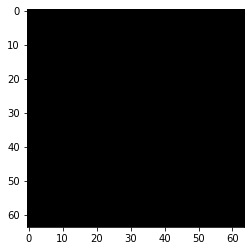

212.9855286428297


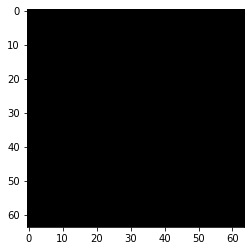

212.9855286428297


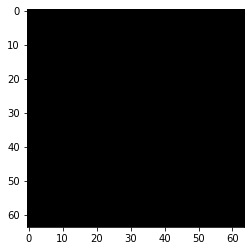

212.9855286428297


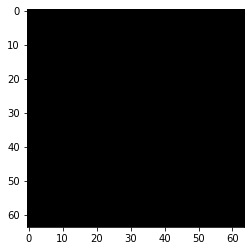

212.9855286428297


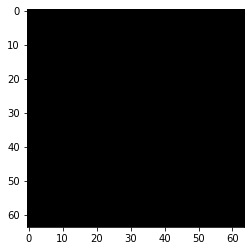

212.9855286428297


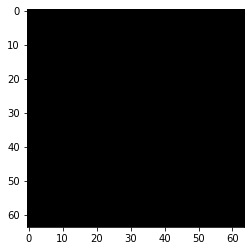

212.9855286428297


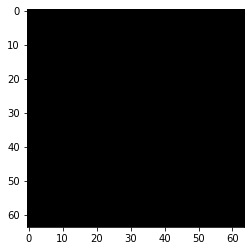

217.34100730488277


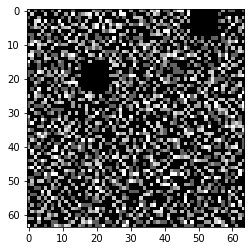

221.6992541330258


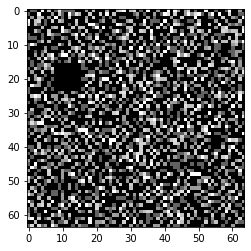

221.6992541330258


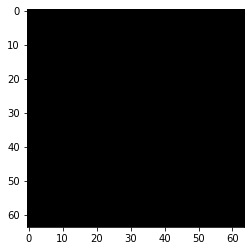

221.6992541330258


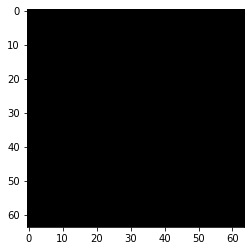

221.6992541330258


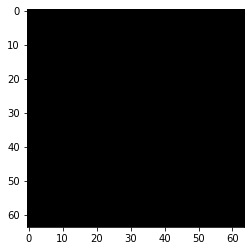

221.6992541330258


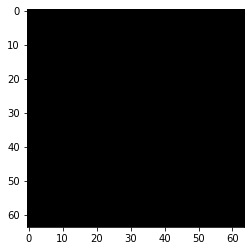

221.6992541330258


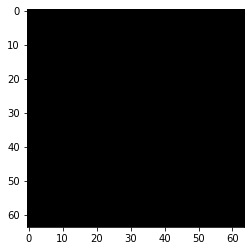

221.6992541330258


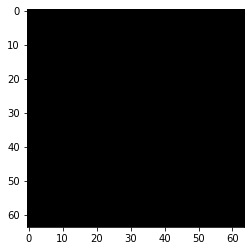

221.6992541330258


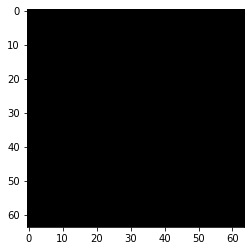

221.6992541330258


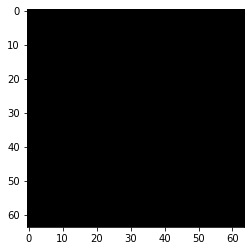

221.761999231065


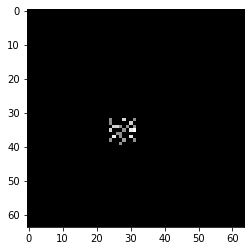

221.7860515186467


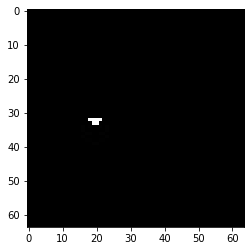

222.54216070742024


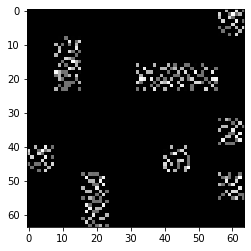

228.97465590157634


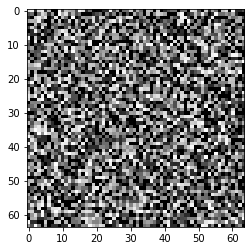

233.0244521337947


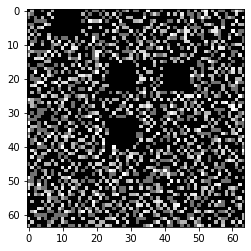

233.0244521337947


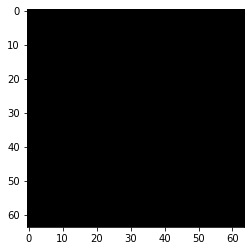

233.5066359092657


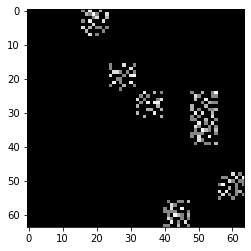

236.16644367550944


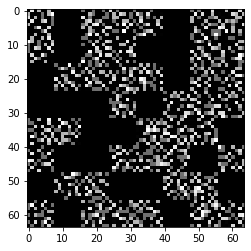

242.07457131872357


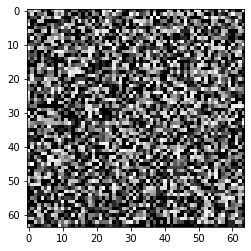

247.95341791618608


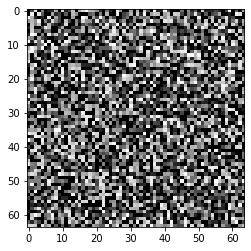

247.95341791618608


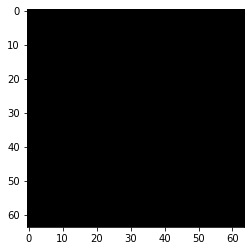

251.5749173394848


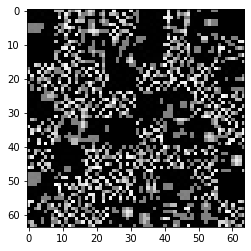

251.5749173394848


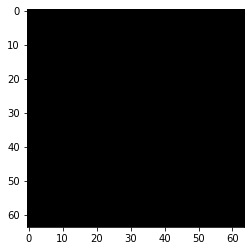

251.63766243752403


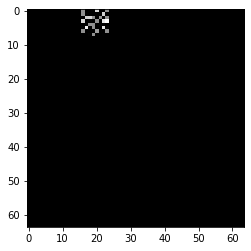

251.63766243752403


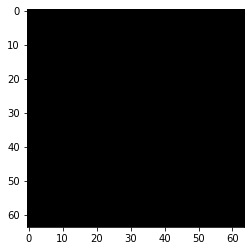

254.03724721261054


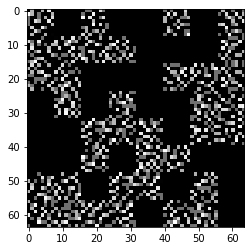

254.03724721261054


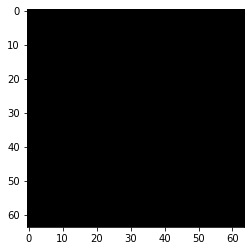

254.03724721261054


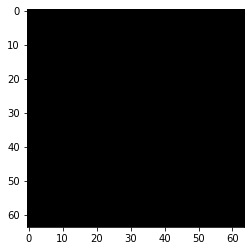

260.58402153018073


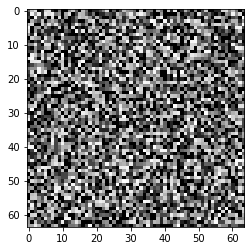

269.9799923106498


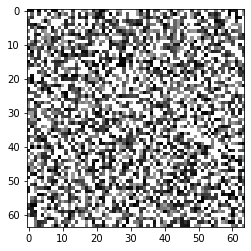

275.37488658208383


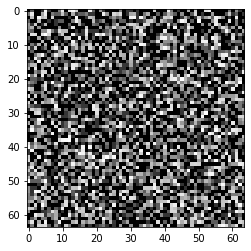

278.9045751633987


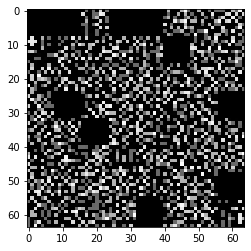

288.2284198385236


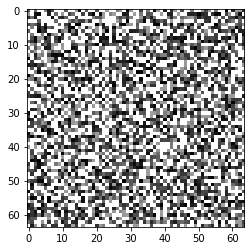

288.2284198385236


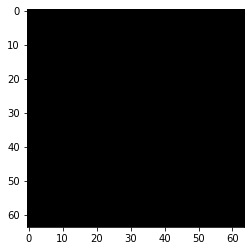

288.2284198385236


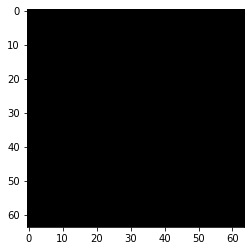

288.2284198385236


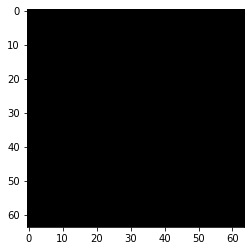

288.2284198385236


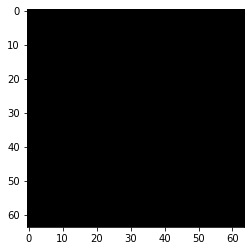

288.38097654748174


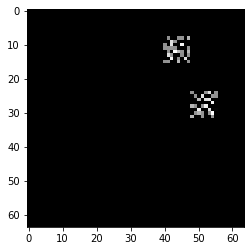

288.38097654748174


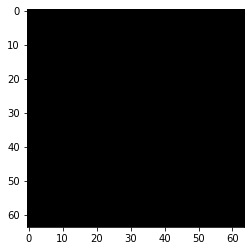

288.38097654748174


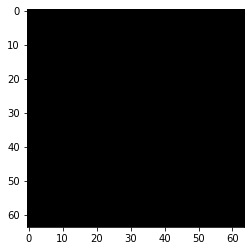

288.38097654748174


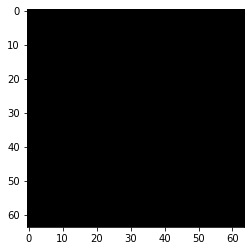

289.0668973471742


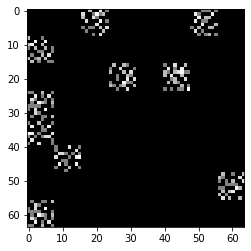

289.84342945021143


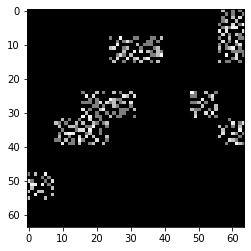

292.12524413687044


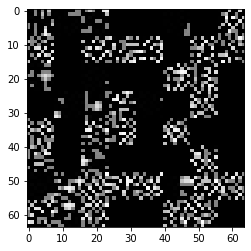

292.39650903498654


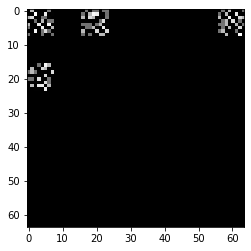

293.31704728950405


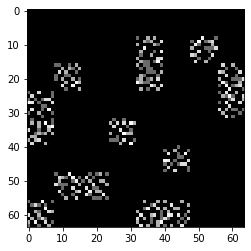

295.45399461745484


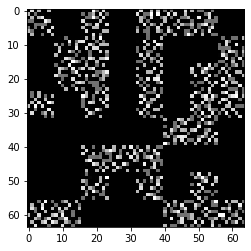

304.0991464821223


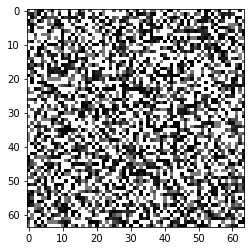

306.58975778546716


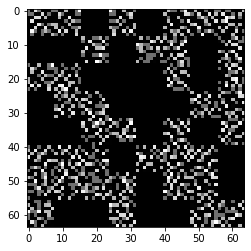

306.8284505959247


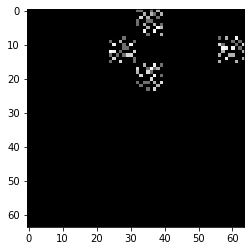

307.0558093041139


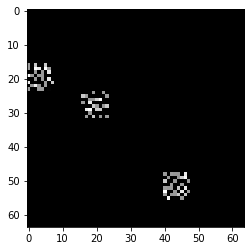

309.3160784313726


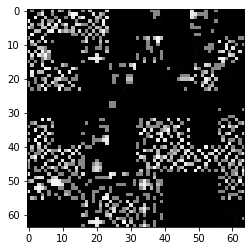

309.89547097270287


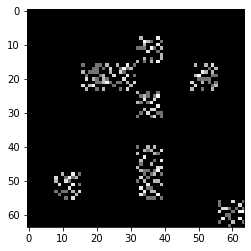

312.4680661284122


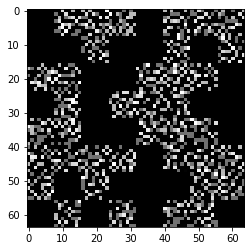

312.6691272587467


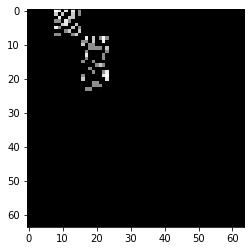

313.99575547866215


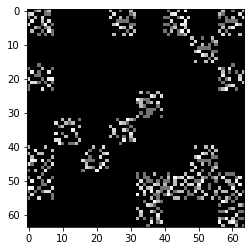

313.99575547866215


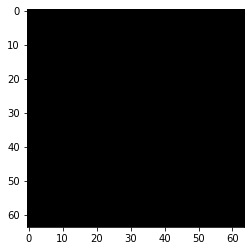

315.6787389465591


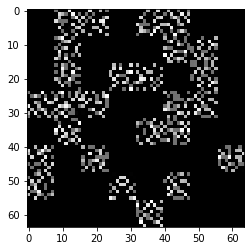

316.3949250288352


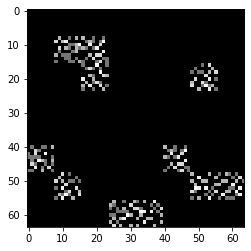

316.3949250288352


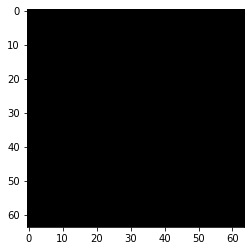

316.3949250288352


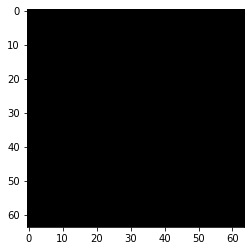

316.3949250288352


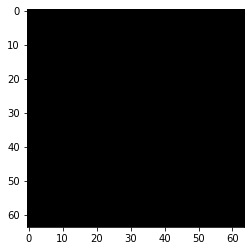

316.3949250288352


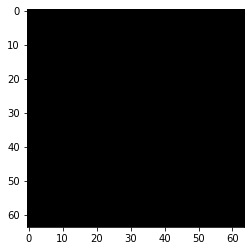

316.3949250288352


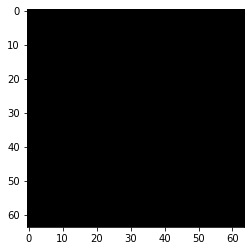

316.3949250288352


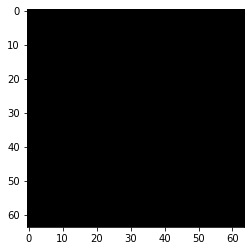

316.3949250288352


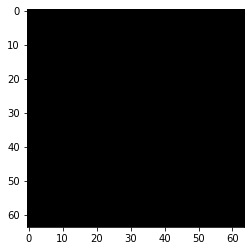

322.9472510572857


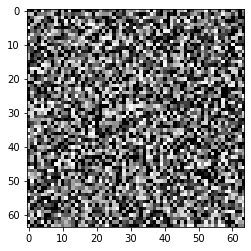

328.46060745866976


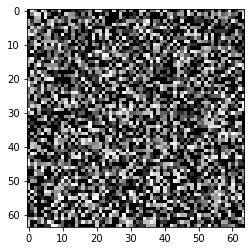

337.89710111495583


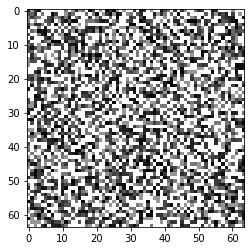

344.4408150711265


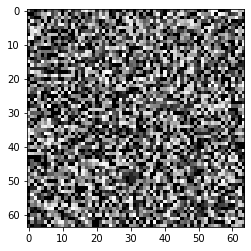

353.45239523260284


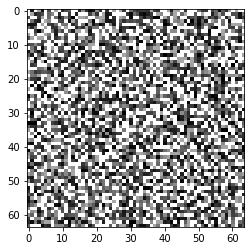

353.5903729334871


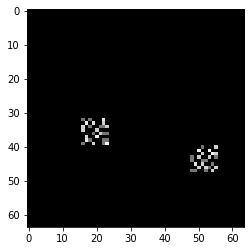

353.5903729334871


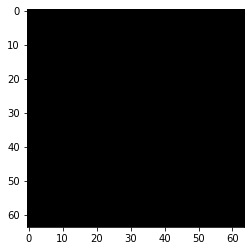

353.5903729334871


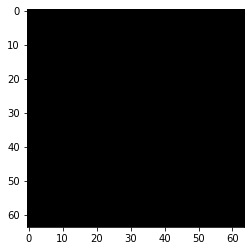

353.5903729334871


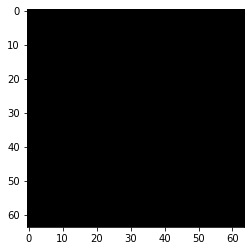

353.5903729334871


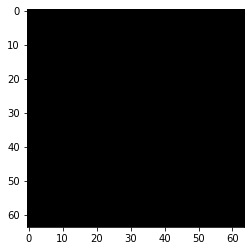

353.5903729334871


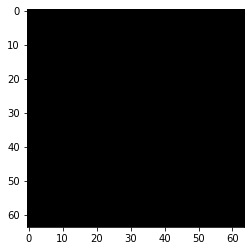

359.5340407535563


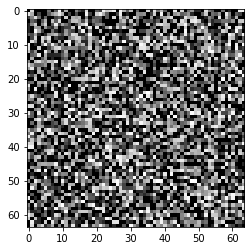

363.7535717031911


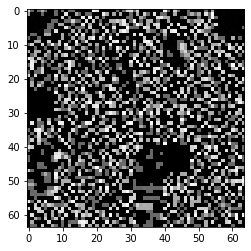

366.20123029603997


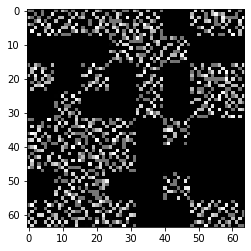

369.7928489042676


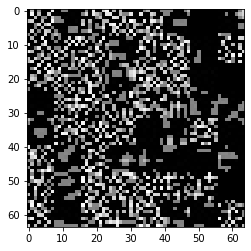

369.7928489042676


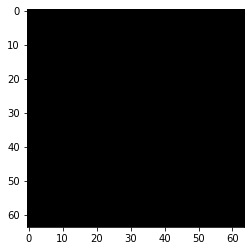

369.7928489042676


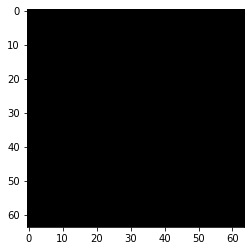

369.7928489042676


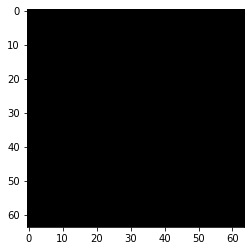

369.8089042675894


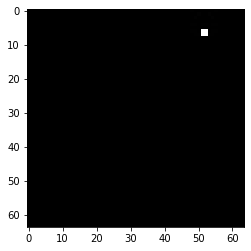

370.56836601307197


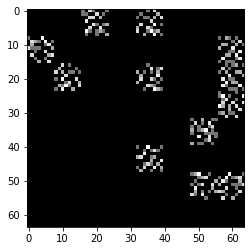

376.804183006536


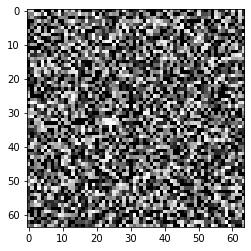

380.76107650903504


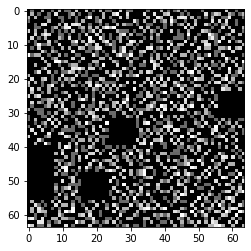

384.7389773164168


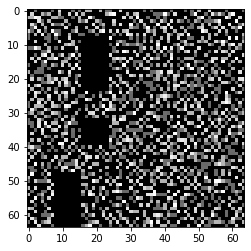

387.648427527874


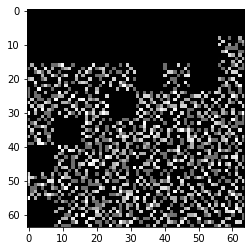

387.648427527874


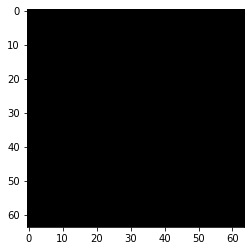

387.648427527874


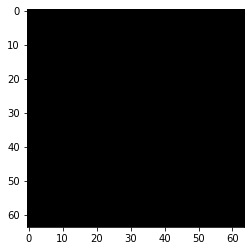

387.648427527874


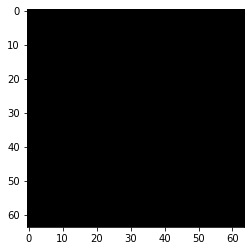

387.648427527874


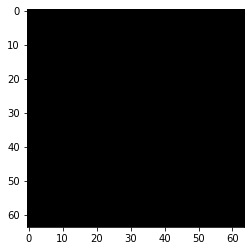

387.648427527874


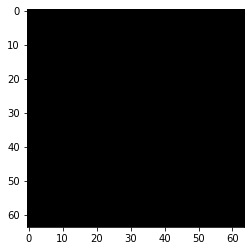

387.648427527874


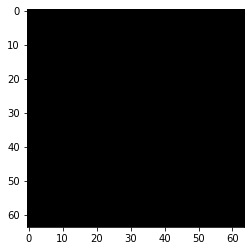

387.648427527874


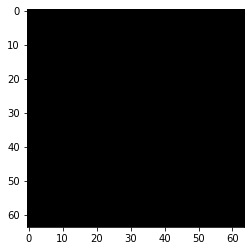

387.648427527874


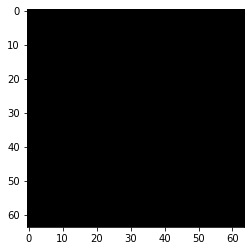

387.648427527874


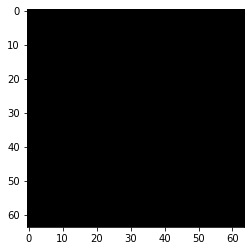

387.648427527874


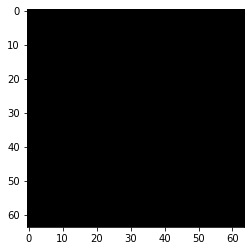

387.648427527874


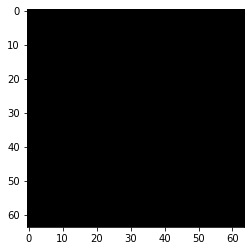

387.648427527874


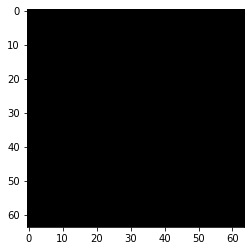

387.648427527874


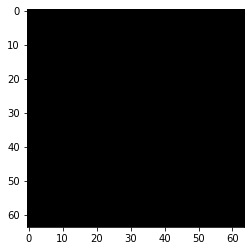

387.648427527874


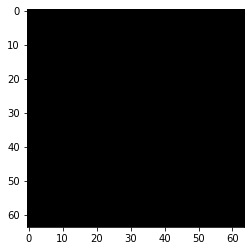

387.648427527874


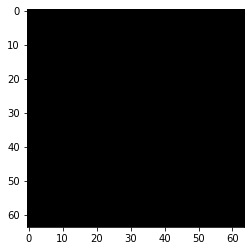

387.648427527874


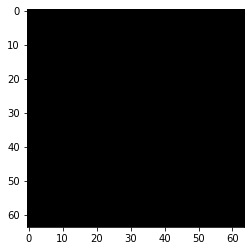

391.64942714340646


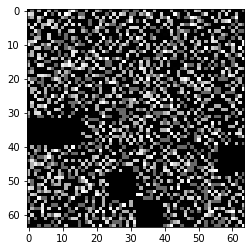

392.4141022683584


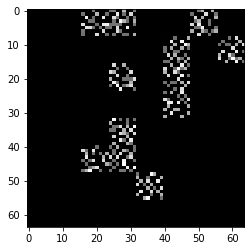

398.6942560553634


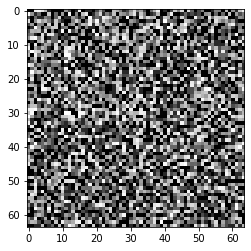

398.9416685890043


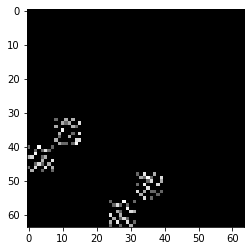

398.9416685890043


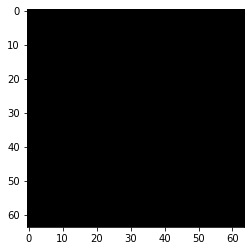

402.71993848519804


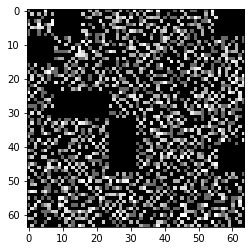

402.71993848519804


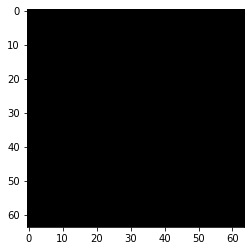

402.71993848519804


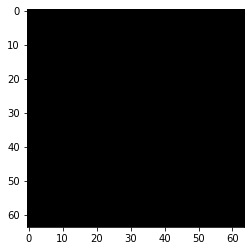

402.71993848519804


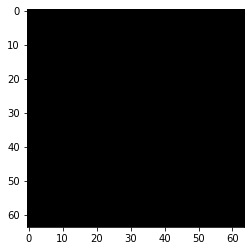

406.6014609765475


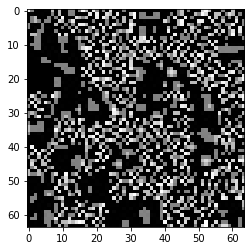

410.8227758554403


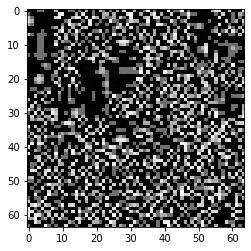

412.93536332179934


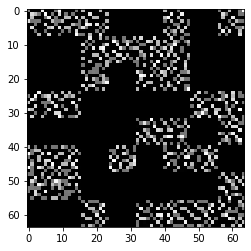

412.93536332179934


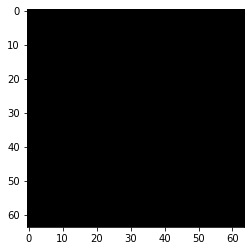

418.7866666666667


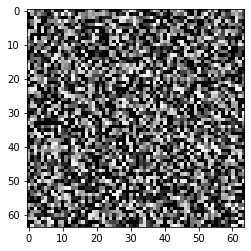

418.7866666666667


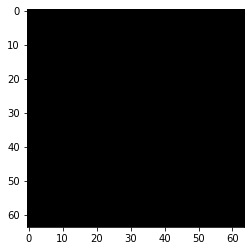

418.7866666666667


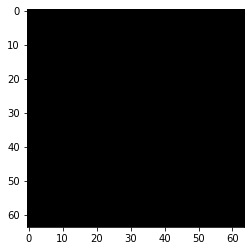

418.7866666666667


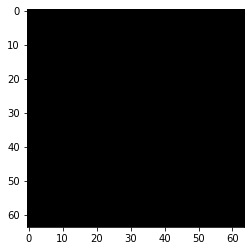

418.7866666666667


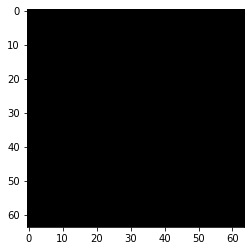

418.7866666666667


KeyboardInterrupt: 

In [111]:
pxl_tot = []

for i in range(0, train_normal.shape[0]):
    pxl_avg = train_normal[i].sum() / 255
    pxl_tot.append(pxl_avg)
#     print(f'Image {i}: {pxl_avg}')
    print(sum(pxl_tot)/255)
    
    if train_normal[i].sum() / 255 <= 3125:
        plt.imshow(train_normal[i], cmap = 'gray')
        plt.show()

In [104]:
sum(pxl_tot)/255

3125.4692195309444

In [ ]:
for i in range(0, train_normal.shape[0]):
#     plt.imshow(train_normal[i], cmap = 'gray')
#     plt.show()
    if train_normal[i].sum() / 255 < 3125:
        plt.imshow(train_normal[i], cmap = 'gray')
        plt.show()

In [4]:
## augmenting the data to create more images
## only run cell if needed

## vertically flip training images
vert_flip_train_attack = np.fliplr(train_attack)
vert_flip_train_normal = np.fliplr(train_normal)

## flip training images horizonatally
hor_flip_train_attack = np.rot90(train_attack, axes = (1,2), k = 2)
hor_flip_train_normal = np.rot90(train_normal, axes = (1,2), k = 2)

## rotate training images left and right once each
rotate90l_train_attack = np.rot90(train_attack, axes=(1, 2))
rotate90r_train_attack = np.rot90(train_normal, -1, axes=(1, 2))
rotate90l_train_normal = np.rot90(train_attack, axes=(1, 2))
rotate90r_train_normal = np.rot90(train_normal, -1, axes=(1, 2))



## vertically flip testing images
vert_flip_test_attack = np.fliplr(test_attack)
vert_flip_test_normal = np.fliplr(test_normal)

## flip testing images horizonatally
hor_flip_test_attack = np.rot90(test_attack, axes = (1,2), k = 2)
hor_flip_test_normal = np.rot90(test_normal, axes = (1,2), k = 2)

## rotate testing images left and right once each
rotate90l_test_attack = np.rot90(test_attack, axes=(1, 2))
rotate90r_test_attack = np.rot90(test_normal, -1, axes=(1, 2))
rotate90l_test_normal = np.rot90(test_attack, axes=(1, 2))
rotate90r_test_normal = np.rot90(test_normal, axes=(1, 2))


## stack all the original and augmented data to one single numpy array
train = np.vstack((train_attack, vert_flip_train_attack, hor_flip_train_attack, rotate90l_train_attack, rotate90r_train_attack,
                   train_normal, vert_flip_train_normal, hor_flip_train_normal, rotate90l_train_normal, rotate90r_train_normal))
test = np.vstack((test_attack, vert_flip_test_attack, hor_flip_test_attack, rotate90l_test_attack, rotate90r_test_attack,
                  test_normal, vert_flip_test_normal, hor_flip_test_normal, rotate90l_test_normal, rotate90r_test_normal))

## without rotate data
# train = np.vstack((train_attack, vert_flip_train_attack, hor_flip_train_attack,
#                    train_normal, vert_flip_train_normal, hor_flip_train_normal))
# test = np.vstack((test_attack, vert_flip_test_attack, hor_flip_test_attack,
#                   test_normal, vert_flip_test_normal, hor_flip_test_normal, rotate90l_test_normal, rotate90r_test_normal))                  

In [4]:
## if no augmented data is needed, run this cell
train = np.vstack((train_attack, train_normal))
test = np.vstack((test_attack, test_normal))

train.shape, test.shape

((3701, 64, 64), (412, 64, 64))

In [5]:
train = train.reshape(-1,64,64,1)
test = test.reshape(-1,64,64,1)

train.shape, test.shape

((3701, 64, 64, 1), (412, 64, 64, 1))

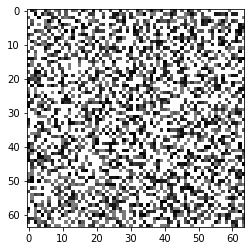

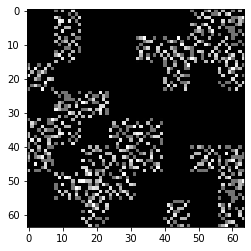

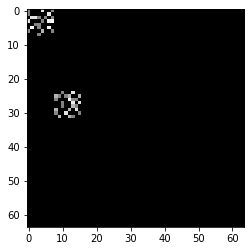

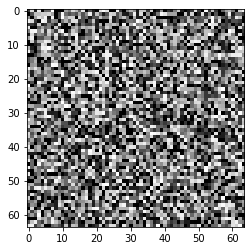

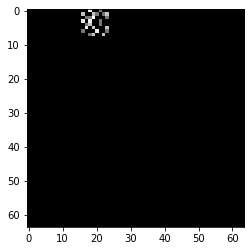

In [6]:
for i in range(0, 5):
    plt.imshow(train[i], cmap = 'gray')
    plt.show()

In [ ]:
print(f'Number of training images: {train.shape[0]}\nNumber of testing images {test.shape[0]}\n')
print(f'Number of training attack: {train_attack.shape[0]}\nNumber of vert flip train attack: {vert_flip_train_attack.shape[0]}\nNumber of training normal: {train_normal.shape[0]}\nNumber of vert flip training normal: {vert_flip_train_normal.shape[0]}\n')

print(f'Number of testing attack: {test_attack.shape[0]}\nNumber of vert flip test attack: {vert_flip_test_attack.shape[0]}\nNumber of hor flip test attack: {hor_flip_test_attack.shape[0]}\nNumber of test normal: {test_normal.shape[0]}\nNumber of vert flip test normal: {vert_flip_test_normal.shape[0]}\n' +
    f'Number of hor flip test normal: {hor_flip_test_normal.shape[0]}\nNumber of rotate90 left test normal: {rotate90l_test_normal.shape[0]}\nNumber of rotate90 right test normal: {rotate90r_test_normal.shape[0]}')

In [7]:
## create the training and testing data labels
## run if not using augmented data

training_labels = []
## add the attack labels
for i in range(0, train_attack.shape[0]):
    training_labels.append('attack')

## add the normal labels
for j in range(train_attack.shape[0], train.shape[0]):
    training_labels.append('normal')



testing_labels = []
## add the attack labels
for k in range(0, test_attack.shape[0]):
    testing_labels.append('attack')

## add the normal labels
for l in range(test_attack.shape[0], test.shape[0]):
    testing_labels.append('normal')

In [6]:
## create the training and testing data labels
## run this cell if using augmented data

training_labels = []
## add the attack labels
for i in range(0, train_attack.shape[0] + vert_flip_train_attack.shape[0] + hor_flip_train_attack.shape[0] + rotate90l_train_attack.shape[0] + rotate90r_train_attack.shape[0]):
    training_labels.append('attack')

## add the normal labels
for j in range(train_attack.shape[0] + vert_flip_train_attack.shape[0] + hor_flip_train_attack.shape[0] + rotate90l_train_attack.shape[0] + rotate90r_train_attack.shape[0], train.shape[0]):
    training_labels.append('normal')



testing_labels = []
## add the attack labels
for k in range(0, test_attack.shape[0] + vert_flip_test_attack.shape[0] + hor_flip_test_attack.shape[0] + rotate90l_test_attack.shape[0] + rotate90r_test_attack.shape[0]):
    testing_labels.append('attack')

## add the normal labels
for l in range(test_attack.shape[0] + vert_flip_test_attack.shape[0] + hor_flip_test_attack.shape[0] + rotate90l_test_attack.shape[0] + rotate90r_test_attack.shape[0], test.shape[0]):
    testing_labels.append('normal')

In [20]:
## create the training and testing data labels
## run this cell if using augmented data but not with rotated data

training_labels = []
## add the attack labels
for i in range(0, train_attack.shape[0] + vert_flip_train_attack.shape[0] + hor_flip_train_attack.shape[0]):
    training_labels.append('attack')
a
## add the normal labels
for j in range(train_attack.shape[0] + vert_flip_train_attack.shape[0] + hor_flip_train_attack.shape[0], train.shape[0]):
    training_labels.append('normal')



testing_labels = []
## add the attack labels
for k in range(0, test_attack.shape[0] + vert_flip_test_attack.shape[0] + hor_flip_test_attack.shape[0] + rotate90l_train_normal.shape[0] + rotate90r_train_normal.shape[0]):
    testing_labels.append('attack')

## add the normal labels
for l in range(test_attack.shape[0] + vert_flip_test_attack.shape[0] + hor_flip_test_attack.shape[0] + rotate90l_train_normal.shape[0] + rotate90r_train_normal.shape[0], test.shape[0]):
    testing_labels.append('normal')

In [8]:
## create the dataframe for labels, then OHE the column
ytrain = pd.DataFrame(training_labels, columns = ['category'])
ytest = pd.DataFrame(testing_labels, columns = ['category'])

ytrain = pd.get_dummies(ytrain['category'])
ytest = pd.get_dummies(ytest['category'])

ytrain, ytest

(      attack  normal
 0          1       0
 1          1       0
 2          1       0
 3          1       0
 4          1       0
 ...      ...     ...
 3696       0       1
 3697       0       1
 3698       0       1
 3699       0       1
 3700       0       1
 
 [3701 rows x 2 columns],
      attack  normal
 0         1       0
 1         1       0
 2         1       0
 3         1       0
 4         1       0
 ..      ...     ...
 407       0       1
 408       0       1
 409       0       1
 410       0       1
 411       0       1
 
 [412 rows x 2 columns])

In [9]:
## shuffle the data to prevent pattern recognition
train, ytrain = sklearn.utils.shuffle(train, ytrain, random_state = 7)
test, ytest = sklearn.utils.shuffle(test, ytest, random_state = 7)

In [10]:
KERNEL_SIZE = [2,2]
IMAGE_SIZE = [64,64,1]

cnn = Sequential()

## convolution 1
cnn.add(Conv2D(2**4, (KERNEL_SIZE), padding="same", activation='relu', input_shape = (IMAGE_SIZE)))
cnn.add(MaxPooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.25))

## convolution 2
cnn.add(Conv2D(2**5, (KERNEL_SIZE), padding="same", activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.25))

## convolution 3
cnn.add(Conv2D(2**6, (KERNEL_SIZE), padding="same", activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.25))

## convolution 4
cnn.add(Conv2D(2**7, (KERNEL_SIZE), padding="same", activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.5))

## convolution 5
# cnn.add(Conv2D(128, (KERNEL_SIZE), padding="same", activation='relu'))
# cnn.add(MaxPooling2D(pool_size = (2,2)))
# # cnn.add(Dropout(0.5))

# ## convolution 6
# cnn.add(Conv2D(128, (KERNEL_SIZE), padding="same", activation='relu'))
# cnn.add(AveragePooling2D(pool_size = (2,2)))
# cnn.add(Dropout(0.5))

cnn.add(Flatten())

## dense
# cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(128, activation='relu'))
# cnn.add(Dense(64, activation='relu'))
# cnn.add(Dense(256, activation='relu'))
# cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation = 'sigmoid'))

# callback = [EarlyStopping(monitor = 'accuracy', mode = 'max', patience = 2)]

cnn.compile(optimizer = keras.optimizers.Adam(), loss = 'binary_crossentropy',
            metrics = ['accuracy'])


cnn.summary()

INFO:plaidml:Opening device "metal_amd_radeon_pro_555x.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         32896     
__________

In [11]:
start = time.time()
model_history = cnn.fit(train, ytrain, batch_size = 128, epochs = 250) ## smaller batch 128-256, 200-250 epochs
end = time.time()

os.system(f'say "training finished in {round(end - start, 2)} seconds"')
print(f'Training finished in {round(end - start, 2)}')

Epoch 1/250
3701/3701 [==============================] - 6s 2ms/step - loss: 4.4094 - acc: 0.6083
Epoch 2/250
3701/3701 [==============================] - 2s 447us/step - loss: 2.5124 - acc: 0.6355
Epoch 3/250
3701/3701 [==============================] - 2s 449us/step - loss: 0.6948 - acc: 0.6452
Epoch 4/250
3701/3701 [==============================] - 2s 454us/step - loss: 0.6036 - acc: 0.6677
Epoch 5/250
3701/3701 [==============================] - 2s 454us/step - loss: 0.5851 - acc: 0.6885
Epoch 6/250
3701/3701 [==============================] - 2s 449us/step - loss: 0.5650 - acc: 0.7091
Epoch 7/250
3701/3701 [==============================] - 2s 452us/step - loss: 0.5367 - acc: 0.7375
Epoch 8/250
3701/3701 [==============================] - 2s 454us/step - loss: 0.5017 - acc: 0.7671
Epoch 9/250
3701/3701 [==============================] - 2s 448us/step - loss: 0.4608 - acc: 0.7984
Epoch 10/250
3701/3701 [==============================] - 2s 452us/step - loss: 0.4201 - acc: 0.8210
E

dict_keys(['loss', 'acc'])


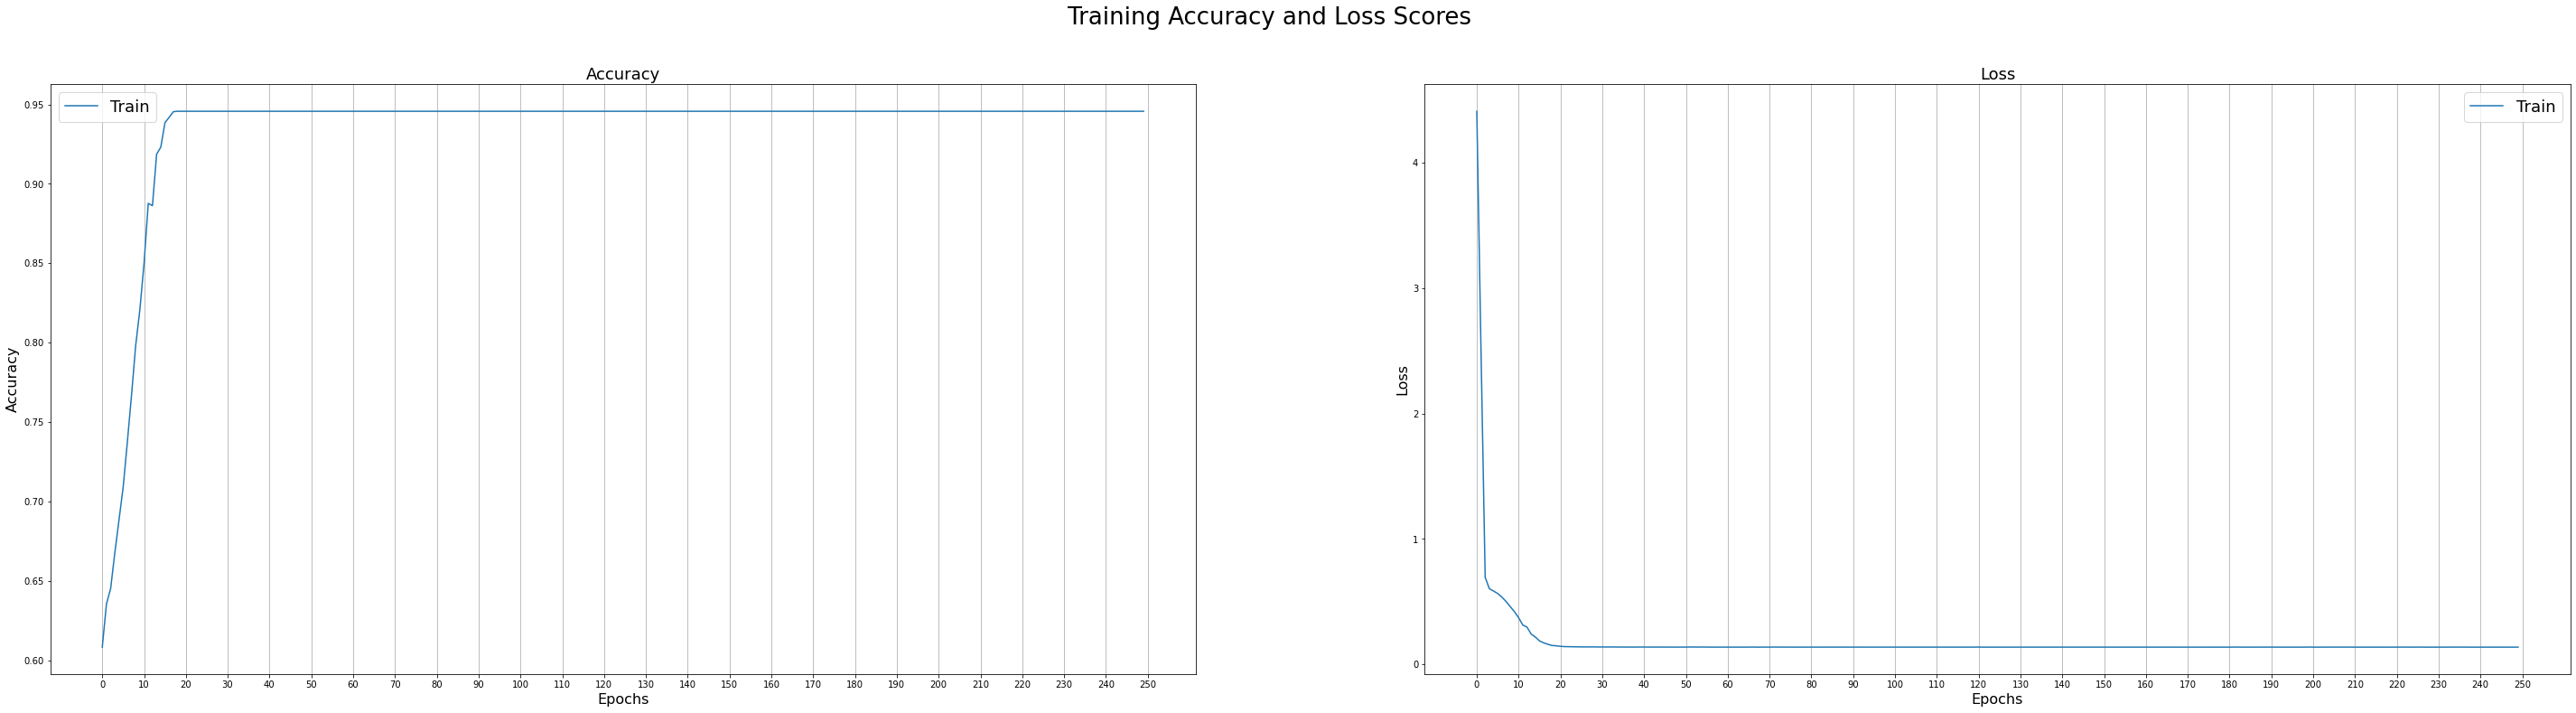

In [12]:
print(model_history.history.keys())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50,12))
fig.suptitle('Training Accuracy and Loss Scores', fontsize = 26)

axes[0].plot(model_history.history['acc'])
# axes[0].plot(model_history.history['val_acc'])
axes[0].set_title('Accuracy', fontsize = 18)
axes[0].set_ylabel('Accuracy', fontsize = 16)
axes[0].set_xlabel('Epochs', fontsize = 16)
axes[0].set_xticks(np.arange(0, 260, step = 10))
axes[0].grid(axis = 'x')
axes[0].legend(['Train', 'Test'], loc = 'best', fontsize = 18)

axes[1].plot(model_history.history['loss'])
# axes[1].plot(model_history.history['val_loss'])
axes[1].set_title('Loss', fontsize = 18)
axes[1].set_ylabel('Loss', fontsize = 16)
axes[1].set_xlabel('Epochs', fontsize = 16)
axes[1].set_xticks(np.arange(0, 260, step = 10))
axes[1].grid(axis = 'x')
axes[1].legend(['Train', 'Test'], loc = 'best', fontsize = 18)

In [13]:
loss, acc = cnn.evaluate(test, ytest, batch_size = 128, verbose = 0)
print(f'Loss = {round(loss, 4)}\tAccuracy = {round(acc, 4)*100}%')

Loss = 2.992	Accuracy = 62.99%


In [60]:
preds = cnn.predict(test)
y_preds = np.argmax(preds, axis = 1)

print('\t Attack\t Normal')
preds[:20]*100

	 Attack	 Normal


array([[ 99.99998,   0.00001],
       [  0.00474,  99.99032],
       [ 99.99941,   0.00001],
       [100.     ,   0.     ],
       [100.     ,   0.     ],
       [  0.     , 100.     ],
       [ 20.73767,  79.41474],
       [ 20.73767,  79.41474],
       [ 20.73767,  79.41474],
       [100.     ,   0.     ],
       [  0.8448 ,  98.8031 ],
       [  8.81538,  81.26327],
       [  0.17258,  99.93524],
       [ 99.47273,   1.45784],
       [  0.3227 ,  98.57411],
       [100.     ,   0.     ],
       [  0.05658,  99.77657],
       [ 99.8027 ,   0.03024],
       [ 18.67053,  60.39744],
       [  7.2627 ,  67.75021]], dtype=float32)

In [61]:
def build_classifier():
    
    cnn = Sequential()

    ## convolution 1
    cnn.add(Conv2D(2**4, (KERNEL_SIZE), padding="same", activation='relu', input_shape = (IMAGE_SIZE)))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    # cnn.add(Dropout(0.5))

    ## convolution 2
    cnn.add(Conv2D(2**5, (KERNEL_SIZE), padding="same", activation='relu'))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    # cnn.add(Dropout(0.5))

    ## convolution 3
    cnn.add(Conv2D(2**6, (KERNEL_SIZE), padding="same", activation='relu'))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    # cnn.add(Dropout(0.5))

    ## convolution 4
    cnn.add(Conv2D(2**7, (KERNEL_SIZE), padding="same", activation='relu'))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    # # cnn.add(Dropout(0.5))
    
    ## convolution 4
#     cnn.add(Conv2D(2**6, (KERNEL_SIZE), padding="same", activation='relu'))
#     cnn.add(MaxPooling2D(pool_size = (2,2)))
    # # cnn.add(Dropout(0.5))

    cnn.add(Flatten())

    ## dense
#     cnn.add(Dense(256, activation='relu'))
    cnn.add(Dense(128, activation='relu'))
#     cnn.add(Dense(128, activation='relu'))
#     cnn.add(Dense(64, activation='relu'))
#     cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation = 'sigmoid'))

    # callback = [EarlyStopping(monitor = 'accuracy', mode = 'max', patience = 2)]

    cnn.compile(optimizer = keras.optimizers.Adam(), loss = 'binary_crossentropy',
                metrics = ['accuracy'])
    
    return cnn

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 128, epochs = 200)

In [63]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, random_state = None)
score = cross_val_score(classifier, test, ytest, cv = kf)
print(f'Model Cross Validation: \n{round(score.mean(), 3)*100}%')
print(f'Model Cross Validation: \n{score}')

os.system('say "cross validation finished"')

Epoch 1/200
329/329 [==============================] - 7s 21ms/step - loss: 3.8590 - acc: 0.5137
Epoch 2/200
329/329 [==============================] - 0s 483us/step - loss: 6.2105 - acc: 0.5167
Epoch 3/200
329/329 [==============================] - 0s 482us/step - loss: 6.2141 - acc: 0.5912
Epoch 4/200
329/329 [==============================] - 0s 483us/step - loss: 6.1334 - acc: 0.5973
Epoch 5/200
329/329 [==============================] - 0s 465us/step - loss: 6.0352 - acc: 0.5988
Epoch 6/200
329/329 [==============================] - 0s 508us/step - loss: 5.9808 - acc: 0.6033
Epoch 7/200
329/329 [==============================] - 0s 476us/step - loss: 5.8016 - acc: 0.6064
Epoch 8/200
329/329 [==============================] - 0s 473us/step - loss: 4.9069 - acc: 0.6748
Epoch 9/200
329/329 [==============================] - 0s 474us/step - loss: 4.9463 - acc: 0.6748
Epoch 10/200
329/329 [==============================] - 0s 475us/step - loss: 4.8982 - acc: 0.6748
Epoch 11/200
329/329

0